In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import random as rd

mnist = pd.read_csv("Data/mnist_784.csv", engine = 'python')

In [2]:
for col in mnist.columns:
    if "class" not in col:
        rand_factor = rd.random()
        minimum = mnist[col].min() * rand_factor
        maximum = mnist[col].max() * rand_factor
        if minimum != maximum:
            mnist[col] = (mnist[col] - minimum)/(maximum - minimum)

In [3]:
mnist["pixel1"].min()

0

# ignore all the text here, it can only be read if not formatted by markdown

# ----------------------------------------------------------------
# Converting to SOMLib format

We need to get it into the format:

INPUT VECTOR:

$TYPE inputvec
$XDIM <# of input vectors>
$YDIM 1
$VECDIM <# of features>
    
<feat 1> <feat 2> ... <name of input vector 1>
<feat 1> <feat 2> ... <name of input vector 2>


TEMPLATE VECTOR:

$TYPE template
$XDIM 7
$YDIM  <# of input vectors>
$VECDIM <# of features>
0 <name of feature 1> <df> <tf> <min_tf> <max_tf> <mean_tf>

1 <name of feature 2> <df> <tf> <min_tf> <max_tf> <mean_tf>
2 <name of feature 3> <df> <tf> <min_tf> <max_tf> <mean_tf>

:
:
:
<# of features - 1>  <name of feature n> <df> <tf> <min_tf> <max_tf> <mean_tf>
    
    

SOMLib Class Information File
Parameter Entries:

# Block of Comments: (optional) several lines of comments each starting with #
$NUM_CLASSES: <integer>, mandatory
Indicates the number of different classes
$CLASS_NAMES: list of strings, mandatory
A space-separated list of the class names
$XDIM: <integer>, mandatory
number of entities per line; fixed to 2
$YDIM: <integer>, mandatory
number of input vectors in file
The header above describes the general file structure.
Following this block, the second block contains a space-separated mapping vector label => class index
<VEC_ID_1> <CLASS_INDEX_VECTOR_1>
:::::::::::::::::::::::::::::::::::::::
<VEC_ID_n> <CLASS_INDEX_VECTOR_n>
The <VEC_ID_1> is of type string and denotes the label of the vector. <CLASS_INDEX> is of type <integer>, and gives the numerical index of the class, starting with 0 and in the order given in the header. Both fields are mandatory.
    
# ----------------------------------------


In [4]:
num_images = 700

In [5]:

vec_label = "im"

with open("SOM-wrong-scaled/vector.in", "w") as f:
    f.write("$TYPE inputvec\n")
    f.write(f"$XDIM {num_images}\n")
    f.write("$YDIM 1\n")
    f.write("$VECDIM 784\n")
    for i, image in mnist.drop("class", axis = 1).head(num_images).iterrows():
        for value in image:
            f.write(f"{value} ")
        f.write(f"{vec_label}{i}\n")

        
with open("SOM-wrong-scaled/vector.tv", "w") as f:
    f.write("$TYPE template\n")
    f.write("$XDIM 7\n")
    f.write(f"$YDIM {num_images}\n")
    f.write("$VECDIM 784\n")
    for i, col in enumerate(mnist.columns):
        if "class" not in col:
            f.write(f"{i} {col} 1 1 1 1 1\n")
            
with open("SOM-wrong-scaled/class_info.cls", "w") as f:
    num_classes = 10
    f.write(f"$NUM_CLASSES {num_classes}\n")
    f.write("$CLASS_NAMES 0 1 2 3 4 5 6 7 8 9\n")
    f.write(f"$XDIM 2\n")
    f.write(f"$YDIM {num_images}\n")
    for i, cls in enumerate(mnist["class"].head(num_images)):
        f.write(f"{vec_label}{i} {cls}\n")

In [6]:
with open("SOM-wrong-scaled/class_info.cls", "w") as f:
    num_classes = 10
    f.write(f"$NUM_CLASSES {num_classes}\n")
    f.write("$CLASS_NAMES 0 1 2 3 4 5 6 7 8 9\n")
    f.write(f"$XDIM 2\n")
    f.write(f"$YDIM {num_images}\n")
    for i, cls in enumerate(mnist["class"].head(num_images)):
        f.write(f"{vec_label}{i} {cls}\n")

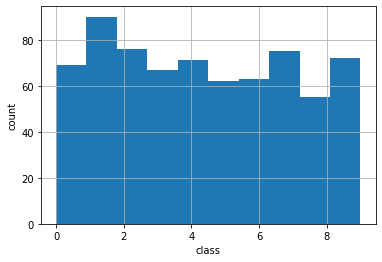

In [7]:
mnist["class"].head(num_images).hist()
#plt.title(f"Class distribution for a sample of {num_images} from the MNIST dataset")
plt.ylabel("count")
plt.xlabel("class")
plt.savefig("Images/som1_class_dist.png")